# 🚀 Ultra-Light Image Classifier | MobileNetV2 & PyTorch  
### Achieves 70% accuracy on CIFAR-10 in just minutes!  
🔹 **Super lightweight** – Optimized for low-resource systems  
🔹 **10x faster training** – Runs efficiently with just 20% of data  
🔹 **Built with MobileNetV2** – A powerful yet compact model  

📌 **Goal**: Train an image classification model **without heavy computing power**!  
📌 **Dataset**: CIFAR-10 (10 classes, resized & normalized)  
📌 **Model**: Pretrained **MobileNetV2** fine-tuned for CIFAR-10  
📌 **Tools Used**: PyTorch, torchvision, NumPy, Matplotlib  


## 📌 Install Required Libraries  
Make sure you have the following libraries installed before running the notebook:


In [1]:
!pip install kagglehub



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import kagglehub

# دانلود دیتاست CIFAR-100
path = kagglehub.dataset_download("fedesoriano/cifar100")

print("Path to dataset files:", path)


100%|█████████████████████████████████████████| 161M/161M [16:06<00:00, 174kB/s]

Extracting files...


Path to dataset files: /Users/rashinfarahani/.cache/kagglehub/datasets/fedesoriano/cifar100/versions/1


## 📌 Import Necessary Libraries  
We load **PyTorch, torchvision**, and **other essential libraries**.


In [13]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.models as models
from torch.utils.data import DataLoader, random_split


## 📌 Load the CIFAR-10 Dataset  
We only use **20% of the training data** to keep it lightweight!


In [7]:
# Check available device (GPU or CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define image preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Simple normalization
])

# Load CIFAR-10 dataset
full_trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Use only 20% of the dataset for training
subset_size = int(len(full_trainset) * 0.2)  # Only 20% of the data
trainset, _ = random_split(full_trainset, [subset_size, len(full_trainset) - subset_size])

# Use lightweight DataLoader to reduce CPU usage
trainloader = DataLoader(trainset, batch_size=32, shuffle=True, num_workers=0)
testloader = DataLoader(testset, batch_size=32, shuffle=False, num_workers=0)

print("✅ Lightweight dataset loaded!")


Files already downloaded and verified
Files already downloaded and verified
✅ Lightweight dataset loaded!


## 📌 Load a Lightweight Model (MobileNetV2)  
We modify the final classifier layer to adapt it for **CIFAR-10 (10 classes)**.


In [8]:
import torchvision.models as models

# Load the MobileNetV2 model (very efficient and lightweight)
model = models.mobilenet_v2(pretrained=True)

# Modify the classifier for CIFAR-10 (10 classes)
model.classifier[1] = torch.nn.Linear(model.classifier[1].in_features, 10)

# Move model to GPU if available
model = model.to(device)

print("✅ MobileNetV2 model loaded!")


✅ MobileNetV2 model loaded!


/Users/rashinfarahani/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


## 📌 Define Loss Function & Optimizer  
We use **CrossEntropyLoss** and an **Adam optimizer** with a small learning rate.


In [9]:
import torch.optim as optim

# Define the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)  # Lower learning rate

print("✅ Model is ready for training!")


✅ Model is ready for training!


## 📌 Training the Model  
We train for **10 epochs** and monitor the **loss** at each step.


In [10]:
num_epochs = 10  # Optimized number of epochs

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    print(f"📢 Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(trainloader):.4f}")

print("🎉 Training finished!")


📢 Epoch 1/10, Loss: 1.3744
📢 Epoch 2/10, Loss: 0.9721
📢 Epoch 3/10, Loss: 0.8125
📢 Epoch 4/10, Loss: 0.6942
📢 Epoch 5/10, Loss: 0.6057
📢 Epoch 6/10, Loss: 0.5443
📢 Epoch 7/10, Loss: 0.4835
📢 Epoch 8/10, Loss: 0.4121
📢 Epoch 9/10, Loss: 0.3744
📢 Epoch 10/10, Loss: 0.3158
🎉 Training finished!


## 📌 Evaluate Model Performance  
We calculate the **test accuracy** to see how well the model performs on unseen data.


In [11]:
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"🎯 Test Accuracy: {accuracy:.2f}%")


🎯 Test Accuracy: 70.85%


## 📌 Visualizing Sample Predictions  
We pick a few test images and see **how well our model predicts them**.


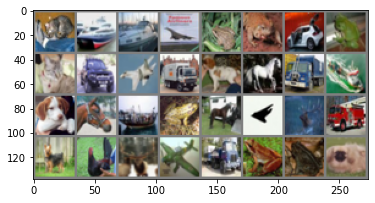

Predicted: ['cat', 'automobile', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile', 'airplane', 'truck', 'dog', 'horse', 'truck', 'ship', 'dog', 'horse', 'ship', 'frog', 'horse', 'airplane', 'deer', 'truck', 'deer', 'cat', 'deer', 'airplane', 'truck', 'frog', 'bird', 'dog']
Actual: ['cat', 'ship', 'ship', 'airplane', 'frog', 'frog', 'automobile', 'frog', 'cat', 'automobile', 'airplane', 'truck', 'dog', 'horse', 'truck', 'ship', 'dog', 'horse', 'ship', 'frog', 'horse', 'airplane', 'deer', 'truck', 'dog', 'bird', 'deer', 'airplane', 'truck', 'frog', 'frog', 'dog']


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Function to unnormalize and display images
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Get predictions
images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Display images with predictions
imshow(torchvision.utils.make_grid(images.cpu()))
print(f'Predicted: {[testset.classes[i] for i in predicted]}')
print(f'Actual: {[testset.classes[i] for i in labels]}')


## 🚀 Next Steps & Improvements
🔹 **Improve accuracy** by using **data augmentation** (random flips, rotations).  
🔹 **Train on 50% of the dataset** for better generalization.  
🔹 **Deploy as a web app** using **Flask or Streamlit**.  
🔹 **Use Grad-CAM** to visualize which parts of an image the model focuses on.  
